In [4]:
from Graph import Graph

In [5]:
# поиск остовного дерева графа
# Результатом является список рёбер графа, входящих в остовное дерево и суммарный вес дерева
# крускала

def undirected_adjacency_matrix(adjacency_matrix):
    # Получаем размерность матрицы
    n = len(adjacency_matrix)
    
    # Создаем нулевую матрицу с размером n x n для соотнесенного графа
    undirected_matrix = [[0] * n for _ in range(n)]
    
    # Заполняем соотнесенную матрицу на основе направленной
    for i in range(n):
        for j in range(i, n):
            undirected_matrix[i][j] = adjacency_matrix[i][j] or adjacency_matrix[j][i]
            undirected_matrix[j][i] = undirected_matrix[i][j]
    
    return undirected_matrix



def find(parent, node):
    if parent[node] == node:
        return node
    return find(parent, parent[node])

def union(parent, rank, u, v):
    root_u = find(parent, u)
    root_v = find(parent, v)

    if rank[root_u] < rank[root_v]:
        parent[root_u] = root_v
    elif rank[root_u] > rank[root_v]:
        parent[root_v] = root_u
    else:
        parent[root_v] = root_u
        rank[root_u] += 1

def kruskal(graph):
    num_vertices = len(graph)
    edges = []

    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if graph[i][j] != 0:
                edges.append((i, j, graph[i][j]))

    edges.sort(key=lambda x: x[2])
    parent = list(range(num_vertices))
    rank = [0] * num_vertices
    mst = []
    mst_weight = 0

    for edge in edges:
        u, v, weight = edge
        if find(parent, u) != find(parent, v):
            mst.append((u, v, weight))  # Включаем вес ребра в остовное дерево
            mst_weight += weight
            union(parent, rank, u, v)

    return mst, mst_weight


In [6]:
# Прима


import heapq
import numpy as np

def matrix_to_adjacency_list(matrix):
    graph = {}
    num_nodes = len(matrix)
    
    for i in range(num_nodes):
        graph[i] = []
        for j in range(num_nodes):
            if matrix[i][j] != 0:
                graph[i].append((j, matrix[i][j]))
    
    return graph

def prim(adj_matrix):
    matrix = np.array(adj_matrix)
    graph = matrix_to_adjacency_list(matrix)
    
    minimum_spanning_tree = []
    num_nodes = len(matrix)
    visited = set()
    
    # Выбираем начальную вершину (можно выбрать любую)
    start_node = 0
    visited.add(start_node)
    
    # Создаем приоритетную очередь для хранения ребер с их весами
    edge_heap = [(weight, start_node, neighbor) for neighbor, weight in graph[start_node]]
    heapq.heapify(edge_heap)
    
    while edge_heap:
        # Извлекаем ребро с минимальным весом
        weight, node1, node2 = heapq.heappop(edge_heap)
        
        # Если вершина node2 еще не посещена, добавляем ребро в остовное дерево
        if node2 not in visited:
            visited.add(node2)
            minimum_spanning_tree.append((node1, node2, weight))
            
            # Добавляем соседние ребра вершины node2 в приоритетную очередь
            for neighbor, edge_weight in graph[node2]:
                if neighbor not in visited:
                    heapq.heappush(edge_heap, (edge_weight, node2, neighbor))
    
    total_weight = sum(weight for _, _, weight in minimum_spanning_tree)
    
    return minimum_spanning_tree, total_weight


<h1>
    From 12 matrix
<h1>

0.013338327407836914
Остовное дерево: [(1, 363, 5), (4, 358, 5), (7, 275, 5), (20, 451, 5), (28, 38, 5), (37, 260, 5), (43, 47, 5), (45, 131, 5), (49, 415, 5), (58, 313, 5), (62, 76, 5), (62, 186, 5), (72, 179, 5), (72, 474, 5), (81, 470, 5), (89, 213, 5), (89, 414, 5), (93, 340, 5), (94, 318, 5), (96, 386, 5), (103, 131, 5), (103, 166, 5), (107, 256, 5), (108, 480, 5), (109, 332, 5), (126, 332, 5), (141, 172, 5), (145, 172, 5), (155, 374, 5), (159, 304, 5), (165, 315, 5), (176, 283, 5), (187, 284, 5), (188, 218, 5), (203, 230, 5), (209, 212, 5), (214, 438, 5), (231, 311, 5), (274, 469, 5), (275, 404, 5), (278, 419, 5), (282, 366, 5), (285, 357, 5), (308, 317, 5), (317, 331, 5), (326, 496, 5), (330, 499, 5), (336, 492, 5), (347, 468, 5), (382, 388, 5), (415, 449, 5), (453, 475, 5), (459, 488, 5), (14, 472, 6), (19, 83, 6), (22, 242, 6), (25, 492, 6), (31, 38, 6), (45, 443, 6), (51, 377, 6), (51, 467, 6), (60, 368, 6), (88, 269, 6), (109, 292, 6), (127, 453, 6), (129, 475, 6), (146, 348

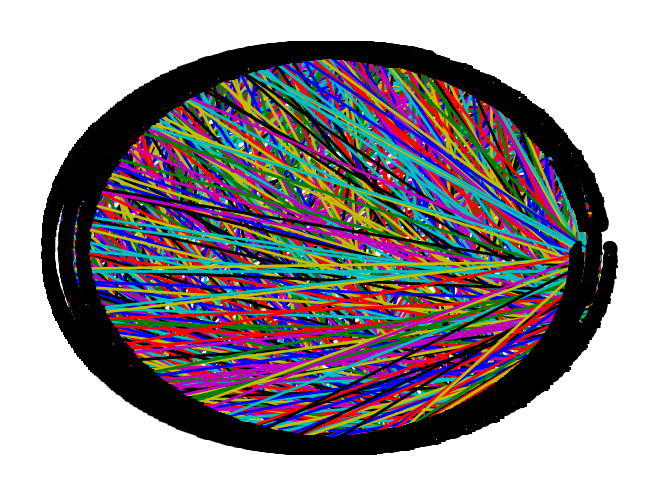

In [68]:
# from Graph import *

matrix_file = "task4/matrix_t4_010.txt"
import time
g = Graph(matrix_file, "-m")


if not g.is_directed():
    start = time.time()
    mst_edges, mst_weight = kruskal(g.get_adjacency_matrix())
    end = time.time()
    res = end - start
    print(res)
    print("Остовное дерево:", mst_edges)
    print("Суммарный вес дерева:", mst_weight)
elif g.is_directed():
    # print(undirected_adjacency_matrix(g.get_adjacency_matrix()))
    mst_edges, mst_weight = kruskal(undirected_adjacency_matrix(g.get_adjacency_matrix()))
    print("Остовное дерево:", mst_edges)
    print("Суммарный вес дерева:", mst_weight)
    

g.get_graph()


# print(g._Graph__adjacency_matrix)


0.046920061111450195
Остовное дерево: [(0, 294, 7), (294, 124, 10), (124, 226, 7), (124, 224, 8), (224, 491, 8), (124, 375, 9), (491, 259, 9), (259, 376, 9), (376, 187, 7), (187, 284, 5), (224, 327, 11), (327, 217, 6), (327, 454, 6), (217, 34, 7), (259, 188, 11), (188, 218, 5), (284, 251, 11), (251, 201, 8), (201, 125, 9), (201, 398, 9), (201, 63, 10), (63, 80, 8), (80, 248, 7), (80, 433, 9), (63, 478, 10), (478, 144, 7), (478, 22, 8), (22, 242, 6), (478, 170, 8), (170, 21, 7), (21, 83, 7), (83, 19, 6), (19, 422, 8), (21, 234, 9), (234, 288, 7), (288, 223, 7), (19, 322, 10), (201, 120, 10), (120, 106, 9), (106, 112, 9), (223, 437, 10), (234, 269, 10), (269, 88, 6), (88, 244, 10), (244, 32, 7), (32, 400, 8), (88, 352, 10), (400, 67, 10), (422, 461, 10), (478, 110, 10), (110, 465, 9), (465, 395, 7), (32, 279, 11), (279, 349, 10), (349, 159, 7), (159, 304, 5), (349, 200, 7), (304, 401, 8), (304, 475, 9), (475, 453, 5), (453, 127, 6), (475, 129, 6), (129, 439, 7), (127, 487, 9), (487, 306,

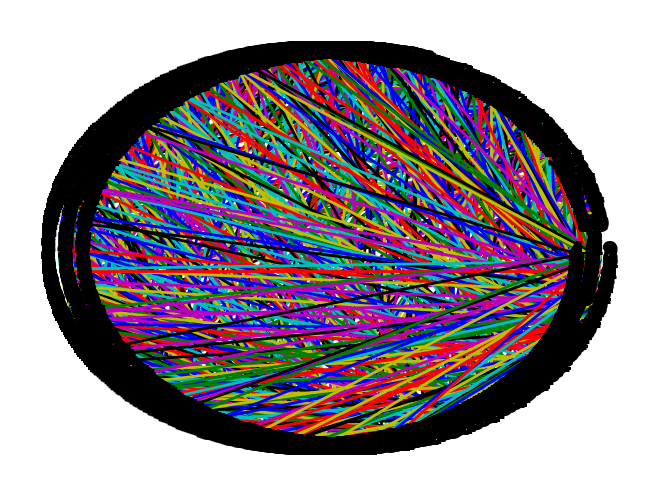

In [71]:
# from Graph import *

matrix_file = "task4/matrix_t4_010.txt"

g = Graph(matrix_file, "-m")

if not g.is_directed():
    start = time.time()


    minimum_spanning_tree, total_weight = prim(g.get_adjacency_matrix())
    end = time.time()
    res = end - start
    print(res)
    print("Остовное дерево:", minimum_spanning_tree)
    print("Суммарный вес дерева:", total_weight)
elif g.is_directed():
    minimum_spanning_tree, total_weight = prim(undirected_adjacency_matrix(g.get_adjacency_matrix()))
    print("Остовное дерево:", minimum_spanning_tree)
    print("Суммарный вес дерева:", total_weight)
    

g.get_graph()


<h1>
    From 13 list
<h1>

In [7]:
list_file = 'task4/list_of_adjacency_t4_005.txt'

g = Graph(list_file, '-l')

g.get_graph()
g.is_directed()
# g.get_vertex_degrees()
# g.floyd_warshall()
# g = Graph(matrix_file, "-m")
# g.get_graph()

FileNotFoundError: [Errno 2] No such file or directory: 'task4/list_of_adjacency_t4_005.txt'

<h1>
    From 1 edge
<h1>

In [31]:
import sys
import os



from ConnectivityLab2.ConnectivityLab2 import find_connected_components_in_graph

connectivity, components= find_connected_components_in_graph(g.get_adjacency_matrix())
print(components)


[[0, 1, 2, 3, 4, 5, 6]]


In [75]:
class AlgBoruvka:
    def __init__(self, graph):
        self._graph = graph
        self._matrix = undirected_adjacency_matrix(graph.get_adjacency_matrix())
        self._matrix_len = len(self._matrix)

    # нахождение минимального остовного дерева
    def spanning_tree(self):
        tree = []
        edges = self._graph._Graph__edges
        # edges = self._graph.list_of_edges()
        parents, size = self.__init_DSU()  # инициализация DSU

        # количество компонент связности, изначально каждая вершина это отдельная компонента
        components = self._matrix_len

        # индекс минимального ребра из каждой компоненты связности
        min_edge = [-1 for i in range(self._matrix_len)]

        # пока не останется одна компонента связности
        while components != 1:
            # изнаально минимальное ребро для каждой компоненты равно -1
            for i in range(self._matrix_len):
                min_edge[i] = -1

            # перебираем все ребра 
            for edge in edges:
                # если ребро соединяет одинаковые компоненты связности - пропускаем
                if self.__root(edge[0], parents) == self.__root(edge[1], parents):
                    continue

                # находим лидера вершины v из ребра (v, u) и если минимальное ребро не найдено 
                # или вес просматриваемого ребра меньше веса минимального ребра - 
                # запоминаем индекс минимального ребра для leader_v вершины
                leader_v = self.__root(edge[0], parents)
                if min_edge[leader_v] == -1 or edge[2] < min_edge[leader_v][2]:
                    min_edge[leader_v] = edge

                # аналогично для лидера вершины u из ребра (v, u)
                leader_u = self.__root(edge[1], parents)
                if min_edge[leader_u] == -1 or edge[2] < min_edge[leader_u][2]:
                    min_edge[leader_u] = edge

            # если минимальное ребро найдено - объединяем компоненты, добавляем ребро в дерево
            # а также количество компонент связности уменьшаем на единицу
            for i in range(self._matrix_len):
                if min_edge[i] != -1 and self.__union(min_edge[i][0], min_edge[i][1], parents, size):
                    # tree.append([min_edge[i][0] + 1, min_edge[i][1] + 1, min_edge[i][2]])
                    tree.append([min_edge[i][0], min_edge[i][1], min_edge[i][2]])
                    components -= 1

        # подсчет веса полученного дерева
        tree_weight = sum((tree[i][2] for i in range(len(tree))))

        return tree, tree_weight

    # DSU аналогичное алгоритму Краскала с эвристиками сжатия путей и весов деревьев
    def __init_DSU(self):
        p = [i for i in range(self._matrix_len)]
        s = [1] * self._matrix_len
        return p, s

    def __root(self, vertice, parent):
        if parent[vertice] != vertice:
            parent[vertice] = self.__root(parent[vertice], parent)
        return parent[vertice]

    def __union(self, aa, bb, parent, size):
        a = self.__root(aa, parent)
        b = self.__root(bb, parent)
        if a == b:
            return False
        elif size[a] > size[b]:
            parent[b] = a
            size[a] += size[b]
        else:
            parent[a] = b
            size[b] += size[a]
        return True





start = time.time()

gr = AlgBoruvka(g)
print(gr.spanning_tree())
end = time.time()
res = end - start
# print(g._Graph__edges)

print(res)


([[0, 294, 7], [1, 363, 5], [2, 355, 7], [3, 25, 7], [4, 358, 5], [5, 354, 19], [6, 21, 12], [7, 275, 5], [8, 15, 7], [9, 310, 11], [10, 447, 11], [11, 481, 11], [12, 367, 7], [13, 119, 12], [14, 472, 6], [16, 380, 19], [17, 473, 7], [18, 42, 20], [19, 83, 6], [20, 451, 5], [21, 83, 7], [22, 242, 6], [23, 394, 10], [24, 82, 10], [25, 492, 6], [26, 241, 7], [27, 46, 10], [28, 38, 5], [29, 336, 10], [30, 93, 12], [31, 38, 6], [32, 244, 7], [33, 247, 8], [34, 217, 7], [35, 140, 13], [36, 151, 7], [37, 260, 5], [39, 328, 21], [40, 263, 10], [41, 372, 8], [42, 346, 7], [43, 47, 5], [44, 182, 10], [45, 131, 5], [46, 459, 7], [48, 273, 9], [49, 415, 5], [50, 142, 8], [51, 377, 6], [52, 282, 8], [53, 492, 11], [54, 393, 10], [55, 438, 15], [3, 56, 13], [57, 400, 21], [58, 313, 5], [59, 453, 12], [60, 368, 6], [61, 450, 10], [62, 76, 5], [63, 80, 8], [64, 473, 7], [65, 140, 10], [66, 138, 11], [67, 400, 10], [68, 331, 22], [69, 76, 7], [36, 70, 13], [71, 171, 13], [72, 179, 5], [73, 427, 14], [

False


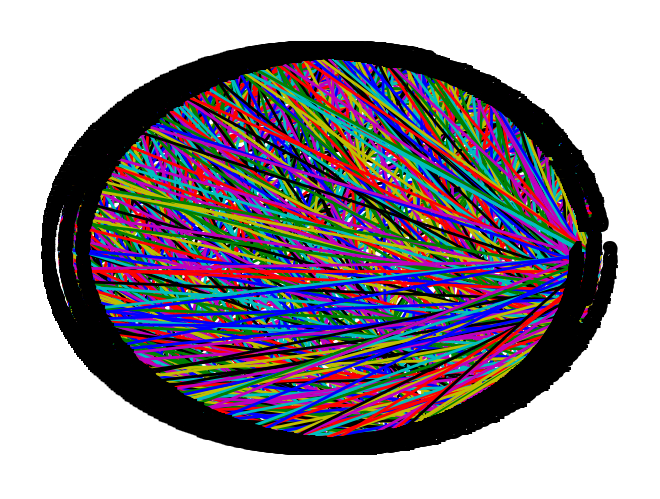

In [73]:
edge_file = 'task4/list_of_edges_t4_010.txt'
g = Graph(edge_file, '-e')

g.get_graph()
g.is_directed()
# g.get_vertex_degrees()
# g.floyd_warshall()


print(g.is_directed())
